# Машинне навчання з підкріпленням

![title](img/rl_base_schema.png)

In [1]:
import os
from PIL import Image
import cv2
import numpy as np
from gymnasium.vector.utils import spaces
from matplotlib import pyplot as plt
from stable_baselines3.common.callbacks import CheckpointCallback, BaseCallback
from stable_baselines3 import PPO
import gymnasium as gym
import pandas as pd
from stable_baselines3.ppo import CnnPolicy
from stable_baselines3.common.evaluation import evaluate_policy

2024-05-20 14:00:27.286799: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-20 14:00:28.391308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
image_folder_path = './img/'
ppo_model_folder = os.path.join('main', 'Training', 'SavedModels', 'ppo-CarRacing-v2')


## Середовище

### Повне середовище

![title](img/img_1.png)

### Дані агента

![title](img/img_2.png)

### Середовище з огляду агента

![title](img/img_3.png)

## Ініціалізація середовища

In [3]:
env = gym.make('CarRacing-v2', render_mode='human')

# Алгоритми

## DQN vs PPO vs A2C

![title](plots/img.png)

# Тренування PPO алгоритму

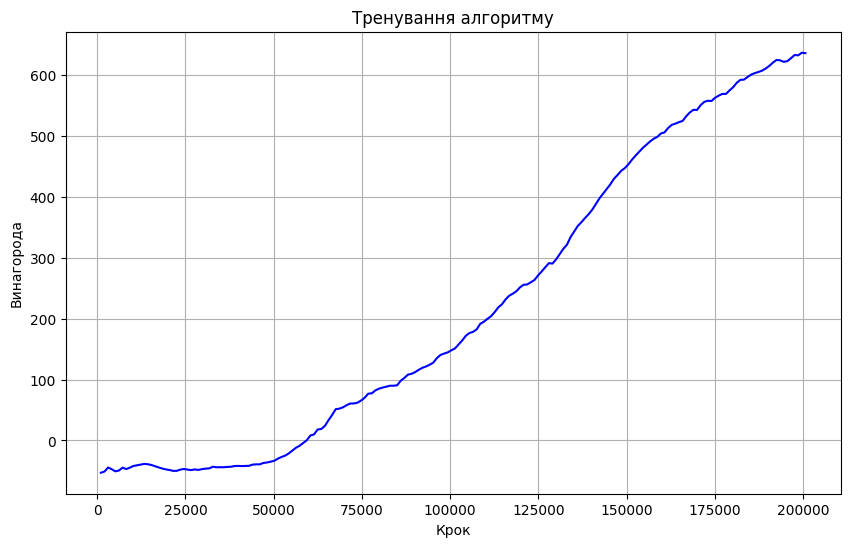

In [4]:
df = pd.read_csv('train_PPO.csv')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Step'], df['Value'], linestyle='-', color='b')
plt.title('Тренування алгоритму')
plt.xlabel('Крок')
plt.ylabel('Винагорода')

plt.grid(True)
plt.show()

# Результати тренування та тестування алгоритму PPO

![title](img/img_4.png)

In [5]:
ppo_path = os.path.join('main', 'ppo_checkpoints', 'ppo-CarRacing-v2')
model = PPO.load(ppo_path, env, device='cpu')
evaluate_policy(model, env, n_eval_episodes=50, render=True, return_episode_rewards=True)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.


/home/oleksii/Projects/CarRacing/DQN-Car-Racing/.venv/lib/python3.10/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


KeyboardInterrupt: 